# Dataset Analysis

In [21]:
import sys
sys.path.append("../src")
import numpy as np
from datasets.BavarianCrops_Dataset import BavarianCropsDataset
from datasets.GAFDataset import GAFDataset
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from matplotlib import cm
from matplotlib.lines import Line2D
import pandas as pd
import matplotlib.pyplot as plt

def save_plot(fig,fname):
    from matplotlib.backends.backend_pdf import PdfPages
    print(f"writing {fname}")
    with PdfPages(fname) as pdf:
        pdf.savefig(fig,bbox_inches='tight')
        
def get_npy(dataset):

    x = list()
    y = list()
    meta= list()
    for i in range(len(dataset)):
        x_,y_,meta_ = dataset[i]
        x.append(x_.numpy())
        y.append(y_.numpy())
        meta.append(meta_)

    return np.stack(x), np.stack(y), np.stack(meta)

## Load Partitions from two regions

In [3]:

tum_dataset = BavarianCropsDataset(root="../data/BavarianCrops", 
                     region="holl", 
                     partition="test",
                     classmapping = "../data/BavarianCrops/classmapping23.csv", 
                     scheme="random",
                     samplet=50, 
                     mode="traintest")

tum_dataset_krum = BavarianCropsDataset(root="../data/BavarianCrops", 
                     region="krum", 
                     partition="test",
                     scheme="random",
                     classmapping = "../data/BavarianCrops/classmapping23.csv", 
                     samplet=50, 
                     mode="traintest")


gaf_dataset = GAFDataset("/data/GAFdataset", region="holl", partition="test", 
                     scheme="random", classmapping="../data/BavarianCrops/classmapping23.csv", features="all")

Initializing BavarianCropsDataset test partition in holl
read 23 classes
precached dataset files found at ../data/BavarianCrops/npy/classmapping23.csv/random/holl/test
loaded 6901 samples
Dataset ../data/BavarianCrops. region holl. partition test. X:6901x(74, 13), y:(6901,) with 23 classes
Initializing BavarianCropsDataset test partition in krum
read 23 classes
precached dataset files found at ../data/BavarianCrops/npy/classmapping23.csv/random/krum/test
loaded 7013 samples
Dataset ../data/BavarianCrops. region krum. partition test. X:7013x(71, 13), y:(7013,) with 23 classes
saving npy arrays to /data/GAFdataset/npy/holl
gaf classes [6, 17, 21, 22, 23, 34, 45, 60, 102, 105] not in classmapping ../data/BavarianCrops/classmapping23.csv. ignoring 103 examples (1.47% of dataset)
Dataset /data/GAFdataset/test_train_holl.h5. region holl. partition test. X:(6903, 23, 18), y:(6903,) with 23 classes


../src/datasets/GAFDataset.py:117: RuntimeWarning: divide by zero encountered in true_divide
  self.classweights = 1 / self.hist


## Get examples from the datasets

In [10]:
tum = get_npy(tum_dataset)
tum2 = get_npy(tum_dataset)
tum3 = get_npy(tum_dataset)
gaf = get_npy(gaf_dataset)

x_krum, y_krum, meta_krum = get_npy(tum_dataset_krum)

tx,ty,tmeta = tum
x,y,meta = gaf

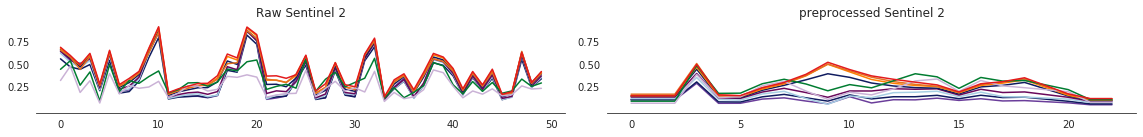

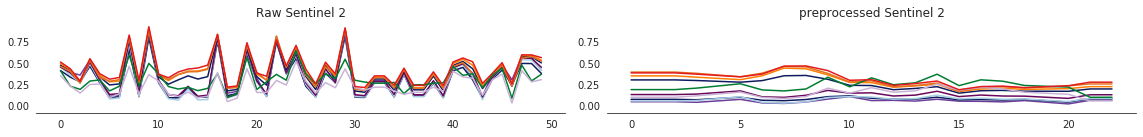

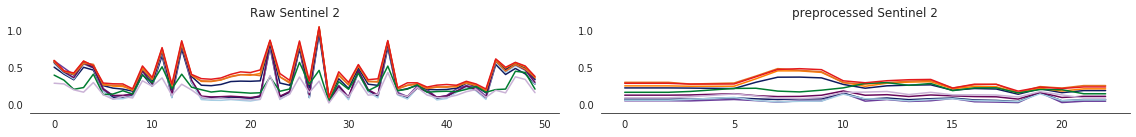

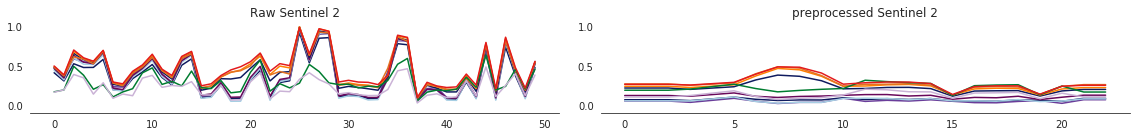

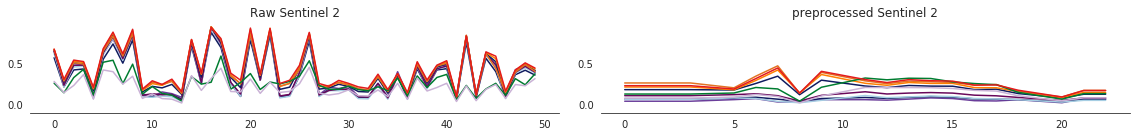

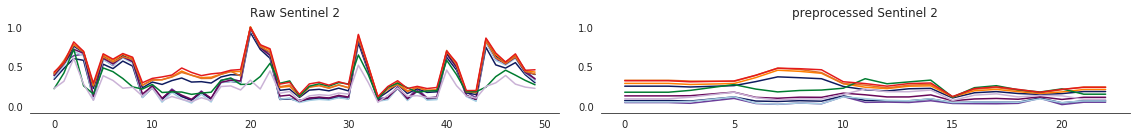

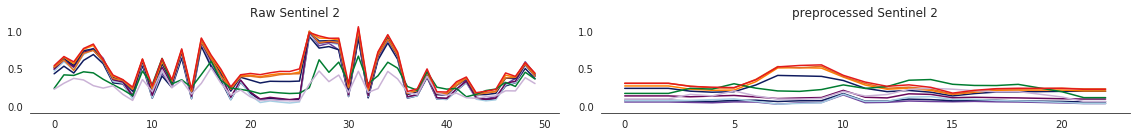

In [11]:
import os


#sns.set_style("whitegrid")

gafbands = ["B02", "B03", "B04", "B05", "B06", "B07", "B08", "B11", "B12", "B8A",
         "BRIGHTNESS", "IRECI", "NDVI", "NDWI", "NDVVVH", "RATIOVVVH", "VH", "VV"]
tumbands = ['B01', 'B10', 'B11', 'B12', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08',
       'B8A', 'B09']

colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00','#cab2d6',
          '#6a3d9a', '#0f1b5f', '#b15928', '#005293', '#98c6ea', '#e37222', '#a2ad00', '#69085a', '#007c30', 
          '#00778a', '#000000', '#0f1b5f']

allbands = list(set(gafbands + tumbands))
colordict = dict(zip(allbands, colors))

colordict = {'B04': '#a6cee3', 'NDWI': '#1f78b4', 'NDVI': '#b2df8a', 'RATIOVVVH': '#33a02c', 'B09': '#fb9a99', 'B8A': '#e31a1c', 'IRECI': '#fdbf6f', 'B07': '#ff7f00', 'B12': '#cab2d6', 'B02': '#6a3d9a', 'B03': '#0f1b5f', 'B01': '#b15928', 'B10': '#005293', 'VH': '#98c6ea', 'B08': '#e37222', 'VV': '#a2ad00', 'B05': '#69085a', 'B11': '#007c30', 'NDVVVH': '#00778a', 'BRIGHTNESS': '#000000', 'B06': '#0f1b5f'}

plotbands = ["B02", "B03", "B04", "B05", "B06", "B07", "B08", "B11", "B12", "B8A"]


def plot_ds(idx, tum, gaf, classname, write=None):
    tx,ty,tmeta = tum
    x,y,meta = gaf
    
    assert meta[idx] == tmeta[idx]
    fig,axs = plt.subplots(1,2, figsize=(16,2))
    
    title = "Parzelle {}: {}".format(meta[idx],classname[y[idx,0]])
    #fig.suptitle(title, x=0.1, y=1.12, horizontalalignment='left', verticalalignment='top', fontsize = 13)
    #plt.subplots_adjust(left=None, bottom=None, right=None, top=.1)
    sns.despine(offset=6, left=True,ax=axs[0])
    sns.despine(offset=6, left=True,ax=axs[1])
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for band in plotbands:
        axs[0].plot(tx[idx,:,tumbands.index(band)], color=colordict[band])
        axs[0].set_title("Raw Sentinel 2")
        axs[1].set_ylim(0,1)
        axs[1].plot(x[idx,:,gafbands.index(band)], color=colordict[band])
        axs[1].set_title("preprocessed Sentinel 2")
        axs[1].set_ylim(*axs[0].get_ylim())
        #axs[2].plot(tx2[idx,:,band], color=colors[band])
        #axs[3].plot(tx3[idx,:,band], color=colors[band])
        
    if write is not None:
        os.makedirs(write, exist_ok=True)
        fig.savefig(os.path.join(write,title)+".png", dpi=300, format="png")

    

## Plot examples from raw and preprocessed field parcels

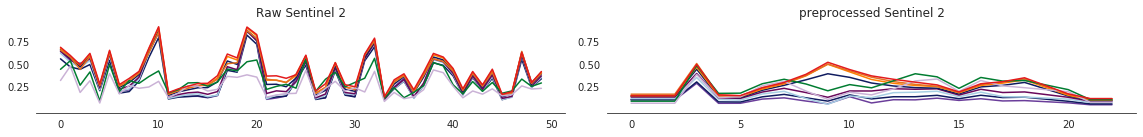

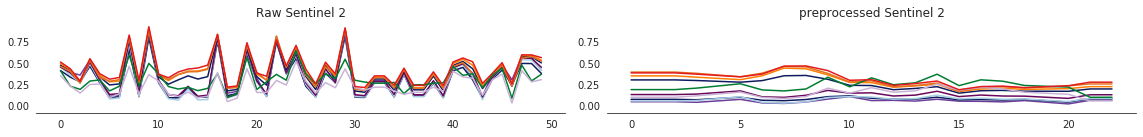

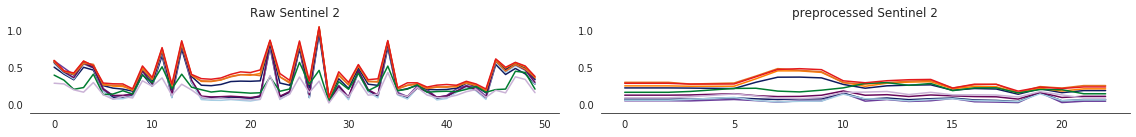

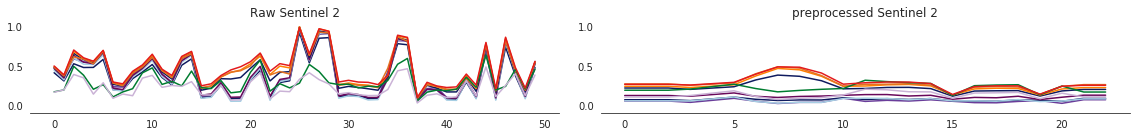

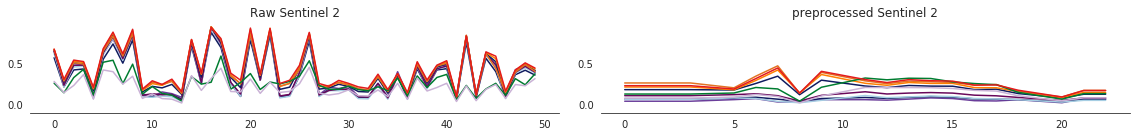

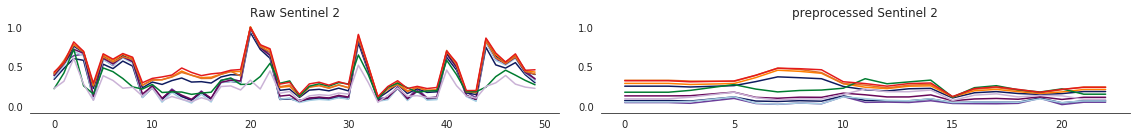

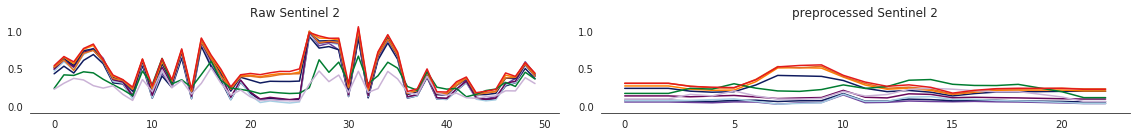

In [16]:
for idx in [3,4,5,6,7,8,9]:
    plot_ds(idx, tum, gaf, tum_dataset.classname, write=None)

## Write examples to csv files for later plotting

writing /tmp/10-71456800.csv
writing /tmp/10-71456800_raw.csv
writing /tmp/11-71459175.csv
writing /tmp/11-71459175_raw.csv
writing /tmp/10-71459194.csv
writing /tmp/10-71459194_raw.csv
writing /tmp/15-71459842.csv
writing /tmp/15-71459842_raw.csv
writing /tmp/10-71460473.csv
writing /tmp/10-71460473_raw.csv
writing /tmp/10-71460748.csv
writing /tmp/10-71460748_raw.csv
writing /tmp/10-71460758.csv
writing /tmp/10-71460758_raw.csv
writing /tmp/10-71460794.csv
writing /tmp/10-71460794_raw.csv
writing /tmp/10-71460855.csv
writing /tmp/10-71460855_raw.csv
writing /tmp/0-71467490.csv
writing /tmp/0-71467490_raw.csv
writing /tmp/10-71467738.csv
writing /tmp/10-71467738_raw.csv
writing /tmp/0-71467829.csv
writing /tmp/0-71467829_raw.csv
writing /tmp/20-71470139.csv
writing /tmp/20-71470139_raw.csv
writing /tmp/17-71470146.csv
writing /tmp/17-71470146_raw.csv
writing /tmp/1-71470174.csv
writing /tmp/1-71470174_raw.csv
writing /tmp/1-71470189.csv
writing /tmp/1-71470189_raw.csv
writing /tmp/5-7

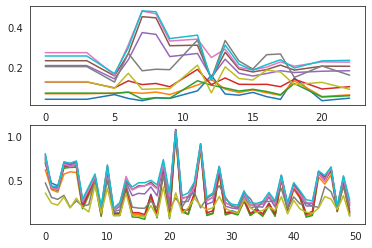

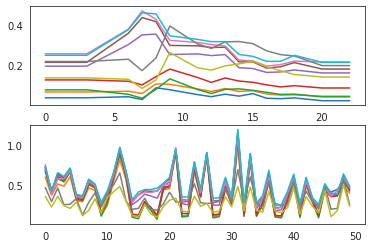

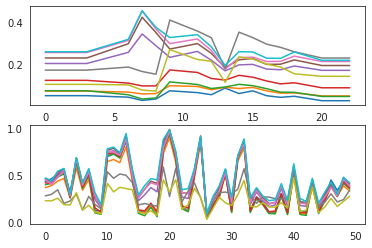

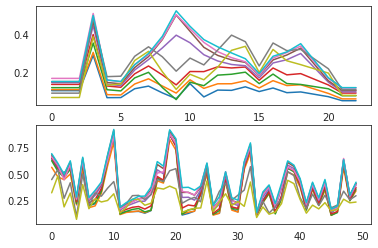

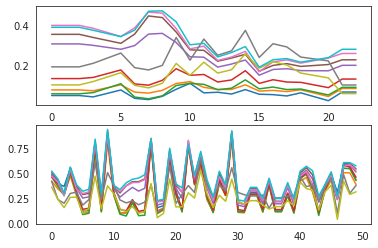

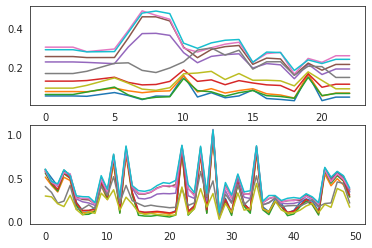

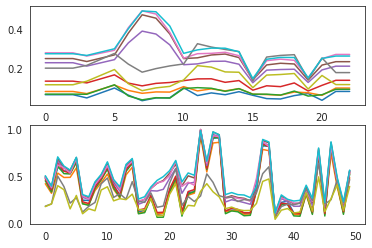

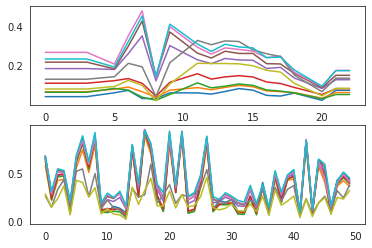

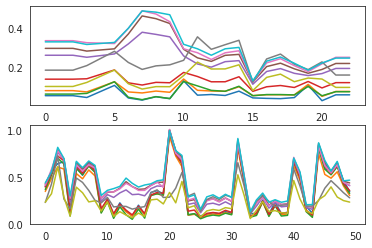

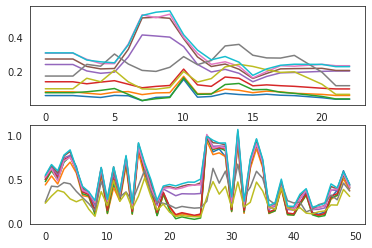

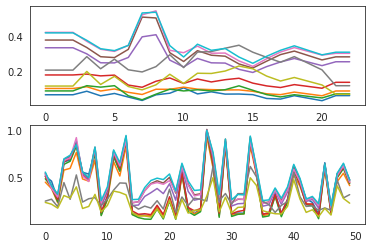

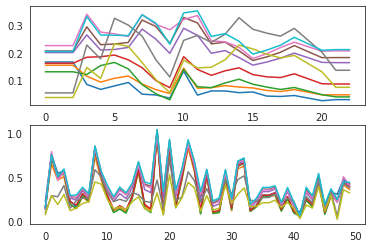

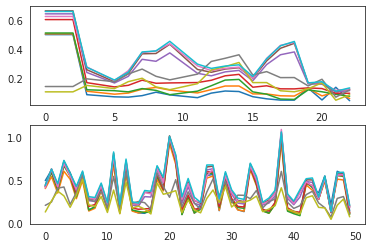

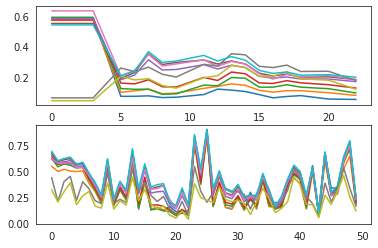

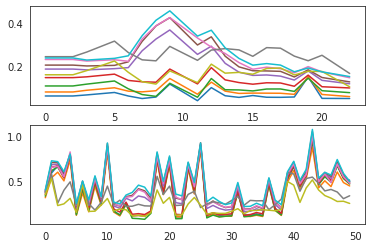

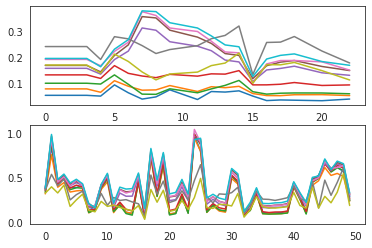

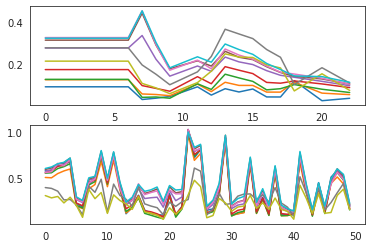

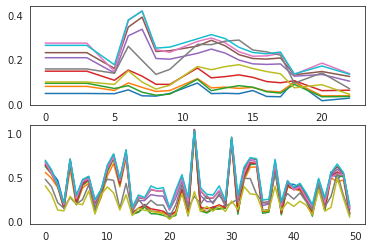

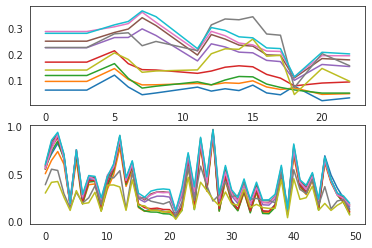

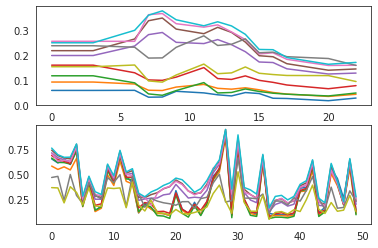

In [17]:
outpath = "/tmp"

for idx in np.arange(20):

    # select the same bands (in the same sequence)
    tx_idx = np.stack([tx[idx,:,tumbands.index(band)] for band in plotbands],-1)
    # select the same bands (in the same sequence)
    x_idx = np.stack([x[idx,:,gafbands.index(band)] for band in plotbands],-1)

    xdf = pd.DataFrame(x_idx, columns=plotbands)
    xdf.index.name="t"
    f = outpath+"/{}-{}.csv".format(y[idx,0], meta[idx])
    print("writing "+f)
    xdf.to_csv(f)

    txdf = pd.DataFrame(tx_idx, columns=plotbands)
    #txdf.index.name="t"
    f = outpath+"/{}-{}_raw.csv".format(ty[idx,0], meta[idx])
    print("writing "+f)
    #txdf.to_csv(f)
    #tx["label"] = y[idx,0]
    #tx["labelname"] = tum_dataset.classname[y[idx,0]]

    fig,axs = plt.subplots(2)
    axs[0].plot(x_idx)
    axs[1].plot(tx_idx)


## Write separate legend image

{'B04': '#a6cee3', 'NDWI': '#1f78b4', 'NDVI': '#b2df8a', 'RATIOVVVH': '#33a02c', 'B09': '#fb9a99', 'B8A': '#e31a1c', 'IRECI': '#fdbf6f', 'B07': '#ff7f00', 'B12': '#cab2d6', 'B02': '#6a3d9a', 'B03': '#0f1b5f', 'B01': '#b15928', 'B10': '#005293', 'VH': '#98c6ea', 'B08': '#e37222', 'VV': '#a2ad00', 'B05': '#69085a', 'B11': '#007c30', 'NDVVVH': '#00778a', 'BRIGHTNESS': '#000000', 'B06': '#0f1b5f'}


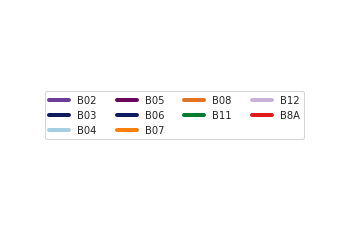

In [13]:
colors = [colordict[p] for p in plotbands]

legendfig, ax = plt.subplots(1, 1)
legend_elements = [Line2D([0], [0], color=color, lw=4, label=band) for band,color in dict(zip(plotbands, colors)).items()]
print(colordict)
ax.legend(handles=legend_elements, ncol=4, loc="center")
ax.axis("off")
legendfig.savefig("/tmp/legend.png",dpi=300)

# Prepare for Class Histograms

In [23]:
def get_ds(region, scheme="blocks", mode=None, classmapping=""):

    train = BavarianCropsDataset(root="../data/BavarianCrops", 
                         region=region, 
                         partition="train",
                         scheme=scheme,
                         mode=None,
                         classmapping = classmapping, 
                         samplet=70)
    
    valid = BavarianCropsDataset(root="../data/BavarianCrops", 
                         region=region, 
                         partition="valid",
                         scheme=scheme,
                         mode=None,
                         classmapping = classmapping, 
                         samplet=70)

    test = BavarianCropsDataset(root="../data/BavarianCrops", 
                         region=region, 
                         partition="test",
                         scheme=scheme,
                         mode=None,
                         classmapping = classmapping, 
                         samplet=70)
    
    return train,valid,test, train.classname

def get_labels(region, classmapping):
    train,valid,test,classname = get_ds(region,classmapping=classmapping)
    return np.hstack([train.y,valid.y,test.y]),classname

## Iterate through the label data from each partition for histograms

In [24]:
classmapping="../data/BavarianCrops/classmapping23.csv"
#holltrainds,hollvalidds, holltestds = get_ds("holl", classmapping="/data/BavarianCrops/classmapping.isprs.csv")

yholl,classname = get_labels("holl",classmapping=classmapping)
ynowa,classname = get_labels("nowa",classmapping=classmapping)
ykrum,classname = get_labels("krum",classmapping=classmapping)

labels = np.hstack([yholl,ynowa,ykrum])
nclasses = len(np.unique(labels))

holl,a = np.histogram(yholl, bins=nclasses, range=(0,nclasses))
nowa,b = np.histogram(ynowa, bins=nclasses, range=(0,nclasses))
krum,c = np.histogram(ykrum, bins=nclasses, range=(0,nclasses))

count,d = np.histogram(labels, bins=nclasses, range=(0,nclasses))
idxs = np.argsort(count)
idxs = np.flip(idxs,axis=0)

  0%|          | 52/22407 [00:00<00:43, 515.82it/s]

Initializing BavarianCropsDataset train partition in holl
read 23 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/holl


  1%|          | 50/4211 [00:00<00:08, 499.66it/s]

loaded 21308 samples
Dataset ../data/BavarianCrops. region holl. partition train. X:21308x(71, 13), y:(21308,) with 23 classes
Initializing BavarianCropsDataset valid partition in holl
read 23 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/holl


100%|██████████| 4211/4211 [00:07<00:00, 580.52it/s]


loaded 4000 samples
Dataset ../data/BavarianCrops. region holl. partition valid. X:4000x(146, 13), y:(4000,) with 23 classes
Initializing BavarianCropsDataset test partition in holl
read 23 classes
precached dataset files found at ../data/BavarianCrops/npy/classmapping23.csv/blocks/holl/test


  0%|          | 30/7865 [00:00<00:26, 293.95it/s]

loaded 9792 samples
Dataset ../data/BavarianCrops. region holl. partition test. X:9792x(144, 13), y:(9792,) with 23 classes
Initializing BavarianCropsDataset train partition in nowa
read 23 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/nowa


100%|██████████| 7865/7865 [00:27<00:00, 285.00it/s]
../src/datasets/BavarianCrops_Dataset.py:204: RuntimeWarning: divide by zero encountered in true_divide
  self.classweights = 1 / self.hist
  4%|▍         | 29/770 [00:00<00:02, 286.45it/s]

loaded 7729 samples
Dataset ../data/BavarianCrops. region nowa. partition train. X:7729x(289, 13), y:(7729,) with 23 classes
Initializing BavarianCropsDataset valid partition in nowa
read 23 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/nowa


100%|██████████| 770/770 [00:02<00:00, 340.69it/s]


loaded 759 samples
Dataset ../data/BavarianCrops. region nowa. partition valid. X:759x(289, 13), y:(759,) with 23 classes
Initializing BavarianCropsDataset test partition in nowa
read 23 classes
precached dataset files found at ../data/BavarianCrops/npy/classmapping23.csv/blocks/nowa/test


  0%|          | 72/20336 [00:00<00:28, 719.53it/s]

loaded 3572 samples
Dataset ../data/BavarianCrops. region nowa. partition test. X:3572x(287, 13), y:(3572,) with 23 classes
Initializing BavarianCropsDataset train partition in krum
read 23 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/krum


  1%|          | 56/5728 [00:00<00:10, 556.26it/s]

loaded 19808 samples
Dataset ../data/BavarianCrops. region krum. partition train. X:19808x(71, 13), y:(19808,) with 23 classes
Initializing BavarianCropsDataset valid partition in krum
read 23 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/krum


100%|██████████| 5728/5728 [00:09<00:00, 632.72it/s]


loaded 5560 samples
Dataset ../data/BavarianCrops. region krum. partition valid. X:5560x(71, 13), y:(5560,) with 23 classes
Initializing BavarianCropsDataset test partition in krum
read 23 classes
precached dataset files found at ../data/BavarianCrops/npy/classmapping23.csv/blocks/krum/test
loaded 4306 samples
Dataset ../data/BavarianCrops. region krum. partition test. X:4306x(143, 13), y:(4306,) with 23 classes


# Plot histograms for 23 class partition

writing /home/marc/projects/ISPRS_CropTypeMapping/images/aoimap/classhist.pdf


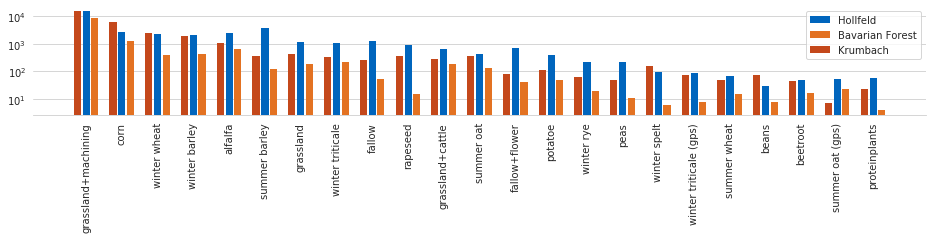

In [25]:
sns.set_style("whitegrid")

tumorange=np.array([227,114,34,255])/255
tumblue=np.array([0,101,189,255])/255
tumbluelight=np.array([152,198,234,255])/255
tumred=np.array([196,72,27,255])/255

fig,ax = plt.subplots(figsize=(16,2))
ax.bar(x=np.arange(len(holl)),height=holl[idxs],  width=.2, linewidth=0, color=tumblue)
ax.bar(x=np.arange(len(nowa))+.24,height=nowa[idxs],  width=.2, linewidth=0, color=tumorange)
ax.bar(x=np.arange(len(krum))-.25,height=krum[idxs],  width=.2, linewidth=0, color=tumred)
ax.set_yscale("log")
#ax.set_ylim((0,100))
ax.set_xticks(np.arange(len(classname)))
ax.set_xticklabels(classname[idxs], rotation = 90)
ax.legend(["Hollfeld","Bavarian Forest","Krumbach"])
ax.grid(which='major', axis='x')
sns.despine(fig=fig,left=True)

fname="/home/marc/projects/ISPRS_CropTypeMapping/images/aoimap/classhist.pdf"
save_plot(fig,fname)
#fig.savefig(fname,dpi=300, transparent=True,bbox_inches='tight')

## Get histograms for 12 class partitions

In [26]:
classmapping="../data/BavarianCrops/classmapping12.csv"
#holltrainds,hollvalidds, holltestds = get_ds("holl", classmapping="/data/BavarianCrops/classmapping.isprs.csv")

yholl,classname = get_labels("holl",classmapping=classmapping)
ynowa,classname = get_labels("nowa",classmapping=classmapping)
ykrum,classname = get_labels("krum",classmapping=classmapping)

labels = np.hstack([yholl,ynowa,ykrum])
nclasses = len(np.unique(labels))

holl,a = np.histogram(yholl, bins=nclasses, range=(0,nclasses))
nowa,b = np.histogram(ynowa, bins=nclasses, range=(0,nclasses))
krum,c = np.histogram(ykrum, bins=nclasses, range=(0,nclasses))

count,d = np.histogram(labels, bins=nclasses, range=(0,nclasses))
idxs = np.argsort(count)
idxs = np.flip(idxs,axis=0)

  0%|          | 59/22407 [00:00<00:38, 587.31it/s]

Initializing BavarianCropsDataset train partition in holl
read 12 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/holl


  1%|▏         | 58/4211 [00:00<00:07, 579.08it/s]

loaded 20858 samples
Dataset ../data/BavarianCrops. region holl. partition train. X:20858x(71, 13), y:(20858,) with 12 classes
Initializing BavarianCropsDataset valid partition in holl
read 12 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/holl


  0%|          | 37/10242 [00:00<00:28, 363.75it/s]

loaded 3909 samples
Dataset ../data/BavarianCrops. region holl. partition valid. X:3909x(146, 13), y:(3909,) with 12 classes
Initializing BavarianCropsDataset test partition in holl
read 12 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/holl


  0%|          | 38/7865 [00:00<00:20, 377.12it/s]

loaded 9583 samples
Dataset ../data/BavarianCrops. region holl. partition test. X:9583x(144, 13), y:(9583,) with 12 classes
Initializing BavarianCropsDataset train partition in nowa
read 12 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/nowa


100%|██████████| 7865/7865 [00:24<00:00, 319.85it/s]
../src/datasets/BavarianCrops_Dataset.py:204: RuntimeWarning: divide by zero encountered in true_divide
  self.classweights = 1 / self.hist
  4%|▍         | 33/770 [00:00<00:02, 322.53it/s]

loaded 7679 samples
Dataset ../data/BavarianCrops. region nowa. partition train. X:7679x(289, 13), y:(7679,) with 12 classes
Initializing BavarianCropsDataset valid partition in nowa
read 12 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/nowa


  1%|          | 25/3664 [00:00<00:14, 245.57it/s]

loaded 746 samples
Dataset ../data/BavarianCrops. region nowa. partition valid. X:746x(289, 13), y:(746,) with 12 classes
Initializing BavarianCropsDataset test partition in nowa
read 12 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/nowa


  0%|          | 83/20336 [00:00<00:24, 825.88it/s]

loaded 3547 samples
Dataset ../data/BavarianCrops. region nowa. partition test. X:3547x(287, 13), y:(3547,) with 12 classes
Initializing BavarianCropsDataset train partition in krum
read 12 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/krum


  1%|          | 55/5728 [00:00<00:10, 545.13it/s]

loaded 19601 samples
Dataset ../data/BavarianCrops. region krum. partition train. X:19601x(71, 13), y:(19601,) with 12 classes
Initializing BavarianCropsDataset valid partition in krum
read 12 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/krum


  1%|          | 51/4492 [00:00<00:09, 468.94it/s]

loaded 5482 samples
Dataset ../data/BavarianCrops. region krum. partition valid. X:5482x(71, 13), y:(5482,) with 12 classes
Initializing BavarianCropsDataset test partition in krum
read 12 classes
no cached dataset found. iterating through csv folders in ../data/BavarianCrops/csv/krum


100%|██████████| 4492/4492 [00:08<00:00, 544.99it/s]


loaded 4278 samples
Dataset ../data/BavarianCrops. region krum. partition test. X:4278x(143, 13), y:(4278,) with 12 classes


writing /home/marc/projects/ISPRS_CropTypeMapping/images/aoimap/classhist_12.pdf


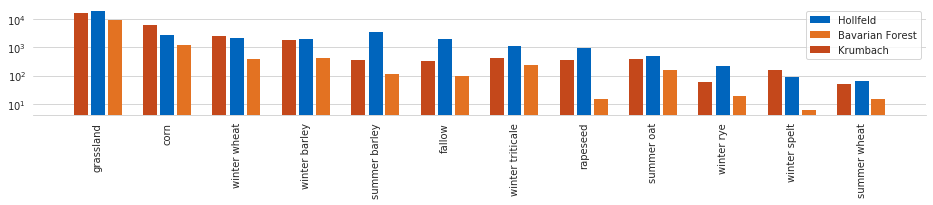

In [52]:
sns.set_style("whitegrid")

tumorange=np.array([227,114,34,255])/255
tumblue=np.array([0,101,189,255])/255
tumbluelight=np.array([152,198,234,255])/255
tumred=np.array([196,72,27,255])/255

fig,ax = plt.subplots(figsize=(16,2))
ax.bar(x=np.arange(len(holl)),height=holl[idxs],  width=.2, linewidth=0, color=tumblue)
ax.bar(x=np.arange(len(nowa))+.24,height=nowa[idxs],  width=.2, linewidth=0, color=tumorange)
ax.bar(x=np.arange(len(krum))-.25,height=krum[idxs],  width=.2, linewidth=0, color=tumred)
ax.set_yscale("log")
#ax.set_ylim((0,100))
ax.set_xticks(np.arange(len(classname)))
ax.set_xticklabels(classname[idxs], rotation = 90)
ax.legend(["Hollfeld","Bavarian Forest","Krumbach"])
ax.grid(which='major', axis='x')
sns.despine(fig=fig,left=True)

fname="/home/marc/projects/ISPRS_CropTypeMapping/images/aoimap/classhist_12.pdf"
save_plot(fig,fname)
#fig.savefig(fname,dpi=300, transparent=True,bbox_inches='tight')

## Split partition histograms per region

In [27]:
def get_partition_historgram(region):
    train, valid, test = get_ds(region)
    trainhist, _ = np.histogram(train.y, bins=nclasses, range=(0,nclasses))
    validhist, _ = np.histogram(valid.y, bins=nclasses, range=(0,nclasses))
    testhist, _ = np.histogram(test.y, bins=nclasses, range=(0,nclasses))
    return trainhist + validhist, testhist

holl_tpl = get_partition_historgram("holl")
nowa_tpl = get_partition_historgram("nowa")
krum_tpl = get_partition_historgram("krum")

offset=.2
width=.3

fig,axs = plt.subplots(3,figsize=(16,6))

axs[0].bar(x=np.arange(len(holl_tpl[0]))-offset,height=holl_tpl[0][idxs],  width=width, linewidth=0, color=tumblue)
#axs[0].bar(x=np.arange(len(holl_tpl[0])),height=holl_tpl[1][idxs],  width=width, linewidth=0, color=tumbluelight)
axs[0].bar(x=np.arange(len(holl_tpl[0]))+offset,height=holl_tpl[1][idxs],  width=width, linewidth=0, color=tumorange)
axs[0].set_title("Hollfeld")

axs[1].bar(x=np.arange(len(nowa_tpl[0]))-offset,height=nowa_tpl[0][idxs],  width=width, linewidth=0, color=tumblue)
#axs[1].bar(x=np.arange(len(nowa_tpl[0]))       ,height=nowa_tpl[1][idxs],  width=width, linewidth=0, color=tumbluelight)
axs[1].bar(x=np.arange(len(nowa_tpl[0]))+offset,height=nowa_tpl[1][idxs],  width=width, linewidth=0, color=tumorange)
axs[1].set_title("Bavarian Forest")

axs[2].bar(x=np.arange(len(krum_tpl[0]))-offset,height=krum_tpl[0][idxs],  width=width, linewidth=0, color=tumblue)
#axs[2].bar(x=np.arange(len(krum_tpl[0]))       ,height=krum_tpl[1][idxs],  width=width, linewidth=0, color=tumbluelight)
axs[2].bar(x=np.arange(len(krum_tpl[0]))+offset,height=krum_tpl[1][idxs],  width=width, linewidth=0, color=tumorange)
axs[2].set_title("Krumbach")

#axs[1].bar(x=np.arange(len(nowa_tpl[0])),height=nowa[idxs],  width=.5, linewidth=0, color=tumorange)

#axs[2].bar(x=np.arange(len(krum_tpl[0])),height=krum[idxs],  width=.5, linewidth=0, color=tumred)

for ax in axs:
    #ax.set_ylim((0,100))
    ax.set_ylabel("#parcels")
    #ax.legend(["Hollfeld","Bav. Forest","Krumbach"])
    ax.grid(which='major', axis='x')
    ax.set_yscale("log")
    ax.legend(["train","test"])
    ax.set_xticks(np.arange(len(holltrainds.classname)))
    ax.set_xticklabels([""]*len(idxs), rotation = 90)

ax.set_xticks(np.arange(len(holltrainds.classname)))
ax.set_xticklabels(holltrainds.classname[idxs], rotation = 90)
    
sns.despine(fig=fig,left=True)
fname="/home/marc/projects/ISPRS_CropTypeMapping/images/aoimap/classhist_traintest.png"
print(f"writing {fname}")
fig.savefig(fname,dpi=300, transparent=True, bbox_inches='tight')

FileNotFoundError: [Errno 2] File b'' does not exist: b''